
# Diabetes Health Indicators Dataset

The purpose of this code notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The dataset is from kaggle. This project will be using only the diabetes_binary_5050split_health_indicators_BRFSS2015.csv. This is a clean dataset of 70692 survey responses to CDC's BRFSS2015. It has a 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classs. 0 is for no diabetes and 1 is for prediabetes or diabetes. It has 22 feature variables and is balanced.

Based on the diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease. The following are the selected subset of features from BRFSS 2015.

- diabetes binary (0 = no diabetes; 1 = prediabetes/diabetes)
- high blood pressure (0 = no high BP; 1 = high BP)
- high cholesterol (0 = no high cholesterol; 1 = high cholesterol)
- cholesterol check (0 = no choesterol check in 5 years; 1 = yes cholesterol check in 5 years)
- BMI (body mass index)
- smoker (smoke at least 100 cigarettes in entire life; 5 packs = 100 cigarettes; 0 = no; 1 = yes)
- stroke (ever told had a stroke; 0 = no; 1 = yes)
- heart disease or attack (coronary heart disease(CHD) or myocardial infarction(MI); 0 = no; 1 = yes)
- physical activity (in past 30 days not including job; 0 = no; 1 = yes))
- fruits (consumed 1 or more times per day; 0 = no; 1 = yes)
- veggies (consumed 1 or more times per day; 0 = no; 1 = yes)
- heavy alcohol consumption (adult men =>14 drinks per week; adult women =>7 drinks per week; 0 = no; 1 = yes)
- any healthcare (any kind of healthcare coverage including health insurance, prepaid plans (HMO etc); 0 = no; 1 = yes)
- no doctor because of cost (past 12 months when needed to see doctor but could not because of cost; 0 = no; 1 = yes)
- general health (general health 5 scale; 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor)
- mental health (days of poor mental health 1-30 days)
- physical health (physical illness or injury days in past 30 days scale of 1-30)
- difficulty walking (have serious difficulty walking or climbing stairs; 0 = no; 1 = yes)
- sex (0 = female; 1 = male)
- age (14 level age category; 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80 or>; 14 = not know/not sure/refused/missing)
- education (scale 1-6, 9); 1 = never attended school or only kindergarten; 2 = elementary; 3 = some high school; 4 = high school graduate; 5 = some college; 6 = college graduate or more; 9 = refused)
- income (scale 1-8; 1 = <10K; 2 = <15K; 3 = <20K; 4 = <25K; 5 = <35K; 6 = <50K; 7 = <75K; 8 = >75K or more; 77 = not know/not sure; 99 = refused)
  
The selected subset of features (columns from the dataset) from BRFSS 2015 was further investigated for additional information in order to understand the meaning of the data gathered from the BRFSS 2015 codebook from the survey.

Additional information about the BRFSS 2015 codebook and relevant paper are as follows:

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.html

## PART THREE

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


from colorama import Fore, Back, Style
import statsmodels.stats.weightstats as ws
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

This is the best place to put all the libraries needed for the project.

In [2]:
#read in the dataset (select 2015)
brfss2015_dataset = pd.read_csv('BRFSSdata/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

The dataset is imported from the source: kaggle using the pd.read_csv.

In [3]:
#use replace NaN with empty string using replace()function [df.replace(np.nan, '' or '-')]
data = brfss2015_dataset.apply(pd.value_counts).T
data.replace(np.nan, '-')

0.0      1.0      2.0      3.0      4.0      5.0   \
Diabetes_binary       35346.0  35346.0        -        -        -        -   
HighBP                30860.0  39832.0        -        -        -        -   
HighChol              33529.0  37163.0        -        -        -        -   
CholCheck              1749.0  68943.0        -        -        -        -   
BMI                         -        -        -        -        -        -   
Smoker                37094.0  33598.0        -        -        -        -   
Stroke                66297.0   4395.0        -        -        -        -   
HeartDiseaseorAttack  60243.0  10449.0        -        -        -        -   
PhysActivity          20993.0  49699.0        -        -        -        -   
Fruits                27443.0  43249.0        -        -        -        -   
Veggies               14932.0  55760.0        -        -        -        -   
HvyAlcoholConsump     67672.0   3020.0        -        -        -        -   
AnyHealthcare          3184.0  67508.0        -        -        -        -   
NoDocbcCost           64053.0   6639.0        -        -        -        -   
GenHlth                     -   8282.0  19872.0  23427.0  13303.0   5808.0   
MentHlth              48091.0   2051.0   3267.0   1967.0    981.0   2519.0   
PhysHlth              39915.0   2853.0   4102.0   2438.0   1376.0   2332.0   
DiffWalk              52826.0  17866.0        -        -        -        -   
Sex                   38386.0  32306.0        -        -        -        -   
Age                         -    979.0   1396.0   2049.0   2793.0   3520.0   
Education                   -     75.0   1647.0   3447.0  19473.0  20030.0   
Income                      -   3611.0   4498.0   5557.0   6658.0   8010.0   

                         6.0      7.0      8.0      9.0   ...  82.0 83.0  \
Diabetes_binary             -        -        -        -  ...     -    -   
HighBP                      -        -        -        -  ...     -    -   
HighChol                    -        -        -        -  ...     -    -   
CholCheck                   -        -        -        -  ...     -    -   
BMI                         -        -        -        -  ...  11.0  1.0   
Smoker                      -        -        -        -  ...     -    -   
Stroke                      -        -        -        -  ...     -    -   
HeartDiseaseorAttack        -        -        -        -  ...     -    -   
PhysActivity                -        -        -        -  ...     -    -   
Fruits                      -        -        -        -  ...     -    -   
Veggies                     -        -        -        -  ...     -    -   
HvyAlcoholConsump           -        -        -        -  ...     -    -   
AnyHealthcare               -        -        -        -  ...     -    -   
NoDocbcCost                 -        -        -        -  ...     -    -   
GenHlth                     -        -        -        -  ...     -    -   
MentHlth                288.0    825.0    198.0     28.0  ...     -    -   
PhysHlth                447.0   1326.0    276.0     55.0  ...     -    -   
DiffWalk                    -        -        -        -  ...     -    -   
Sex                         -        -        -        -  ...     -    -   
Age                    4648.0   6872.0   8603.0  10112.0  ...     -    -   
Education             26020.0        -        -        -  ...     -    -   
Income                10287.0  11425.0  20646.0        -  ...     -    -   

                      84.0 85.0 86.0  87.0 89.0 92.0 95.0 98.0  
Diabetes_binary          -    -    -     -    -    -    -    -  
HighBP                   -    -    -     -    -    -    -    -  
HighChol                 -    -    -     -    -    -    -    -  
CholCheck                -    -    -     -    -    -    -    -  
BMI                   13.0  1.0  1.0  13.0  4.0  9.0  4.0  4.0  
Smoker                   -    -    -     -    -    -    -    -  
Stroke                   -

NaN values or '-' are not applicable, most of the values are 0 and 1 representing yes/no values.

In [4]:
df =brfss2015_dataset.copy()
#df.info()

For PhysHlth and MentHlth, we are aggregating into smaller number of categories for eventual one-hot encoding.

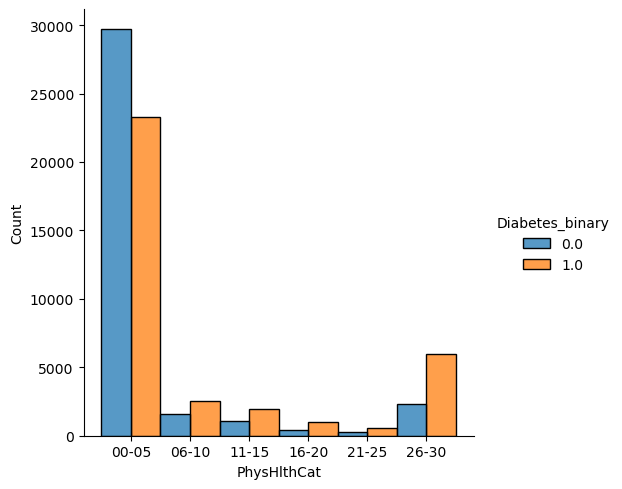

In [5]:
#Aggregated categories of PhysHlt; Simplified categories from 30 to 6 categories within a single data
df['PhysHlthCat'] = '00-05'
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 6) & (df['PhysHlth'] <= 10)) , '06-10', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 11) & (df['PhysHlth'] <= 15)) , '11-15', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 16) & (df['PhysHlth'] <= 20)) , '16-20', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 21) & (df['PhysHlth'] <= 25)) , '21-25', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 26) & (df['PhysHlth'] <= 30)) , '26-30', df['PhysHlthCat'])
df.sort_values(by=['PhysHlthCat'], inplace=True)
df.drop(labels='PhysHlth', axis=1, inplace=True)
sns.displot(df, x='PhysHlthCat', hue='Diabetes_binary', multiple="dodge")

In [6]:
#Aggregated categories of MentHlt; Simplified categories from 30 to 6 categories within a single data
df['MentHlthCat'] = '00-05'
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 6) & (df['MentHlth'] <= 10)) , '06-10', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 11) & (df['MentHlth'] <= 15)) , '11-15', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 16) & (df['MentHlth'] <= 20)) , '16-20', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 21) & (df['MentHlth'] <= 25)) , '21-25', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 26) & (df['MentHlth'] <= 30)) , '26-30', df['MentHlthCat'])
df.sort_values(by=['MentHlthCat'], inplace=True)
df.drop(labels='MentHlth', axis=1, inplace=True)
sns.displot(data=df, x='MentHlthCat', hue='Diabetes_binary', multiple="dodge")

Scaling the BMI data to reduce the possible overemphasizing of the BMI data in the modeling

In [7]:
# Min/Max Scaling of the BMI data
df['BMI'] = (df['BMI']-df['BMI'].min())/(df['BMI'].max()-df['BMI'].min())
df['BMI'].describe()

count    70692.000000
mean         0.207639
std          0.082720
min          0.000000
25%          0.151163
50%          0.197674
75%          0.244186
max          1.000000
Name: BMI, dtype: float64

In [8]:
# OneHotEncoding of the categorical data
df_new = pd.get_dummies(df, columns=['GenHlth', 'MentHlthCat', 'PhysHlthCat', 'Age', 'Education', 'Income'])
df_new.describe().T

count      mean       std  min       25%       50%  \
Diabetes_binary       70692.0  0.500000  0.500004  0.0  0.000000  0.500000   
HighBP                70692.0  0.563458  0.495960  0.0  0.000000  1.000000   
HighChol              70692.0  0.525703  0.499342  0.0  0.000000  1.000000   
CholCheck             70692.0  0.975259  0.155336  0.0  1.000000  1.000000   
BMI                   70692.0  0.207639  0.082720  0.0  0.151163  0.197674   
Smoker                70692.0  0.475273  0.499392  0.0  0.000000  0.000000   
Stroke                70692.0  0.062171  0.241468  0.0  0.000000  0.000000   
HeartDiseaseorAttack  70692.0  0.147810  0.354914  0.0  0.000000  0.000000   
PhysActivity          70692.0  0.703036  0.456924  0.0  0.000000  1.000000   
Fruits                70692.0  0.611795  0.487345  0.0  0.000000  1.000000   
Veggies               70692.0  0.788774  0.408181  0.0  1.000000  1.000000   
HvyAlcoholConsump     70692.0  0.042721  0.202228  0.0  0.000000  0.000000   
AnyHealthcare         70692.0  0.954960  0.207394  0.0  1.000000  1.000000   
NoDocbcCost           70692.0  0.093914  0.291712  0.0  0.000000  0.000000   
DiffWalk              70692.0  0.252730  0.434581  0.0  0.000000  0.000000   
Sex                   70692.0  0.456997  0.498151  0.0  0.000000  0.000000   
GenHlth_1.0           70692.0  0.117156  0.321608  0.0  0.000000  0.000000   
GenHlth_2.0           70692.0  0.281107  0.449543  0.0  0.000000  0.000000   
GenHlth_3.0           70692.0  0.331395  0.470718  0.0  0.000000  0.000000   
GenHlth_4.0           70692.0  0.188183  0.390861  0.0  0.000000  0.000000   
GenHlth_5.0           70692.0  0.082159  0.274609  0.0  0.000000  0.000000   
MentHlthCat_00-05     70692.0  0.832852  0.373110  0.0  1.000000  1.000000   
MentHlthCat_06-10     70692.0  0.046158  0.209829  0.0  0.000000  0.000000   
MentHlthCat_11-15     70692.0  0.032154  0.176409  0.0  0.000000  0.000000   
MentHlthCat_16-20     70692.0  0.017258  0.130232  0.0  0.000000  0.000000   
MentHlthCat_21-25     70692.0  0.007837  0.088179  0.0  0.000000  0.000000   
MentHlthCat_26-30     70692.0  0.063741  0.244293  0.0  0.000000  0.000000   
PhysHlthCat_00-05     70692.0  0.749958  0.433040  0.0  0.000000  1.000000   
PhysHlthCat_06-10     70692.0  0.057772  0.233313  0.0  0.000000  0.000000   
PhysHlthCat_11-15     70692.0  0.041985  0.200556  0.0  0.000000  0.000000   
PhysHlthCat_16-20     70692.0  0.020328  0.141119  0.0  0.000000  0.000000   
PhysHlthCat_21-25     70692.0  0.012279  0.110127  0.0  0.000000  0.000000   
PhysHlthCat_26-30     70692.0  0.117680  0.322231  0.0  0.000000  0.000000   
Age_1.0               70692.0  0.013849  0.116864  0.0  0.000000  0.000000   
Age_2.0               70692.0  0.019748  0.139133  0.0  0.000000  0.000000   
Age_3.0               70692.0  0.028985  0.167765  0.0  0.000000  0.000000   
Age_4.0               70692.0  0.039509  0.194805  0.0  0.000000  0.000000   
Age_5.0               70692.0  0.049793  0.217520  0.0  0.000000  0.000000   
Age_6.0               70692.0  0.065750  0.247846  0.0  0.000000  0.000000   
Age_7.0               70692.0  0.097210  0.296246  0.0  0.000000  0.000000   
Age_8.0               70692.0  0.121697  0.326938  0.0  0.000000  0.000000   
Age_9.0               70692.0  0.143043  0.350119  0.0  0.000000  0.000000   
Age_10.0              70692.0  0.153568  0.360536  0.0  0.000000  0.000000   
Age_11.0              70692.0  0.113789  0.317558  0.0  0.000000  0.000000   
Age_12.0              70692.0  0.076303  0.265484  0.0  0.000000  0.000000   
Age_13.0              70692.0  0.076756  0.266205  0.0  0.000000  0.000000   
Education_1.0         70692.0  0.001061  0.032555  0.0  0.000000  0.000000   
Education_2.0         70692.0  0.023298  0.150850  0.0  0.000000  0.000000   
Education_3.0         70692.0  0.048761  0.215369  0.0  0.000000  0.000000   
Education_4.0         70692.0  0.275463  0.446750  0.0  0.000000  0.000000   
Education_5.0         70692.0  0.283342  0.450

LOGISTIC REGRESSION MODEL

In [9]:
dfy = df_new['Diabetes_binary']
dfX = df_new.copy()
dfX.drop('Diabetes_binary', axis=1, inplace=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(dfX, dfy,
                                                train_size = 0.80,
                                                random_state = 42)

In [10]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [11]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [12]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy on training data: 0.75


In [13]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')

Accuracy on test data: 0.75


We can (and should) use sklearn's classification_report() function to see more details about what the classifier is actually doing. You should be familiar with these additional metrics. 

In [14]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     28305
         1.0       0.74      0.78      0.76     28248

    accuracy                           0.75     56553
   macro avg       0.75      0.75      0.75     56553
weighted avg       0.75      0.75      0.75     56553



In [15]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7041
         1.0       0.74      0.77      0.76      7098

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning

It is common practice to show--when applicable--performance metrics for both the training set and the test set. This means that the model is fitted with the training set, and once fitted, predictions are generated using the training set and the test set, and the corresponding performance metrics are shown (as above), and analyzed.

NOTE: you might want to discuss with your mentor examples of cases when this comparison would not be applicable.

Hint: consider tree-based algorithms such as Random Forest Classifiers. (*)

Since the model's training accuracy (0.89) is pretty good (meaning, close to 1--or 100%), then one says there is only a small "bias" in the model.

Since the model's test accuracy (0.81) is decently close to the training accuracy, we would say that there is a small "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well", which means that the model will be well-behaved when new data is presented to it.

Since the gap between training and testing accuracy is about 8%, one might say that the model is slightly over-fitting the data. Thus, in general, one says that a model is over-fitting (or just overfitting), when there is an important gap between its training performance and its test performance.

Notice two points of nuance in the definition of overfitting: (a) the quantification of important depends on the application; and (b) the comparison of training versus test performance can be done (in many cases) across mulriple performance metrics

These properties are important and desirable.

In this particular case study, however, there are two possible avenues that we might want to investigate:

    Whether the mild imbalance in the dataset might be affecting the algorithm (and thus the model computed with it.)

    Whether the observed mild overfitting can be diminished


RANDOM FOREST mODEL

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(Xtrain, ytrain)
y_pred = model_res.predict(Xtest)
y_pred_prob = model_res.predict_proba(Xtest)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(ytest, y_pred)

f1 = f1_score(ytest, y_pred, average='weighted')
cm = confusion_matrix(ytest, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.736
Random Forest: f1-score=0.736


In [17]:
print("Classification Report for Training Data")
print(classification_report(ytrain, clf.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28305
         1.0       0.99      0.99      0.99     28248

    accuracy                           0.99     56553
   macro avg       0.99      0.99      0.99     56553
weighted avg       0.99      0.99      0.99     56553



In [18]:
print("Classification Report for Test Data")
print(classification_report(ytest, clf.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      7041
         1.0       0.72      0.78      0.75      7098

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



GRADIENT BOOSTING MODEL

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(Xtrain, ytrain)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(Xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(Xtest, ytest)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.710
Accuracy score (validation): 0.710

Learning rate:  0.1
Accuracy score (training): 0.716
Accuracy score (validation): 0.717

Learning rate:  0.25
Accuracy score (training): 0.727
Accuracy score (validation): 0.724

Learning rate:  0.5
Accuracy score (training): 0.730
Accuracy score (validation): 0.724

Learning rate:  0.75
Accuracy score (training): 0.730
Accuracy score (validation): 0.726

Learning rate:  1
Accuracy score (training): 0.729
Accuracy score (validation): 0.723



In [21]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1.0, max_features=2, max_depth = 2, random_state = 0)
gb.fit(Xtrain, ytrain)
ypred = gb.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      7041
         1.0       0.71      0.76      0.73      7098

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



In [22]:
confusion_matrix = pd.crosstab(ytest, ypred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0.0   1.0
Actual               
0.0        4822  2219
1.0        1691  5407


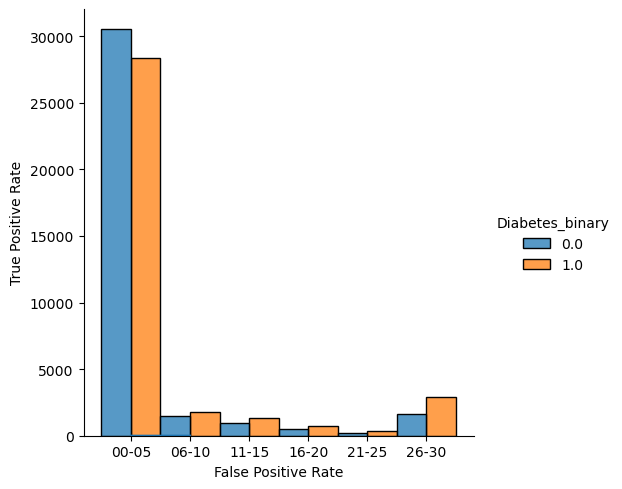

In [23]:
ypred_proba = gb.predict_proba(Xtest)[::,1]
fpr, tpr, _ = roc_curve(ytest,  ypred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
ypredknn = knn.predict(Xtest)
accuracy = accuracy_score(ytest, ypredknn)
print("Accuracy:", accuracy)

Accuracy: 0.6871773109838036


In [25]:
from sklearn import tree, metrics
from io import StringIO
from IPython.display import Image
import pydotplus

In [26]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entr_model
entr_model.fit(Xtrain, ytrain)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_predDT1 = entr_model.predict(Xtest)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_predDT1 = pd.Series(y_predDT1)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [27]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=Xtrain.columns,class_names = ['NOT', 'DIABETIC'])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0608743 to fit



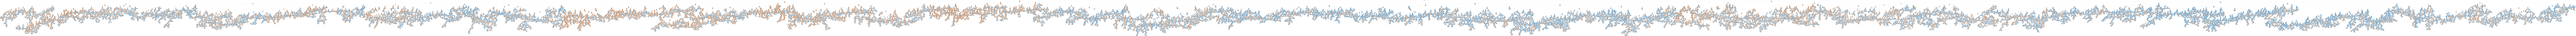

In [28]:
# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(ytest,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(ytest,y_predDT1))
print('Precision score for "Diabetic"' , metrics.precision_score(ytest,y_predDT1, pos_label = "DIABETIC"))
print('Precision score for "Not"' , metrics.precision_score(ytest,y_predDT1, pos_label = "NOT"))
print('Recall score for "Diabetic"' , metrics.recall_score(ytest,y_predDT1, pos_label = "DIABETIC"))
print('Recall score for "Not"' , metrics.recall_score(ytest,y_predDT1, pos_label = "NOT"))

Model Entropy - no max depth
Accuracy: 0.7361906782657897
Balanced accuracy: 0.6658498712348144


ValueError: pos_label=DIABETIC is not a valid label. It should be one of [0.0, 1.0]

In [ ]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)

# Call fit() on entr_model
entr_model.fit(Xtrain, ytrain)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_predDT2 = entr_model.predict(Xtest)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_predDT2 = pd.Series(y_predDT2)

# Check out entr_model
entr_model

In [ ]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=Xtrain.columns,class_names = ['NOT', 'DIABETIC'])

In [ ]:
# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Run this block for model evaluation metrics 
print("Model Gini - no max depth")
print("Accuracy:", metrics.accuracy_score(ytest,y_predDT2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(ytest,y_predDT2))
print('Precision score for "Diabetic"' , metrics.precision_score(ytest,y_predDT2, pos_label = "DIABETIC"))
print('Precision score for "Not"' , metrics.precision_score(ytest,y_predDT2, pos_label = "NOT"))
print('Recall score for "Diabetic"' , metrics.recall_score(ytest,y_predDT2, pos_label = "DIABETIC"))
print('Recall score for "Not"' , metrics.recall_score(ytest,y_predDT2, pos_label = "NOT"))